In [ ]:
"""Used the following website to help with reading CSV files: 
https://www.geeksforgeeks.org/python/how-to-read-from-a-file-in-python/"""

import csv 

#getting quaternino data from first IMU sensor

with open("Quaternions_sensor_1_result4.csv", newline='') as csvfile:

    csvreader = csv.reader(csvfile)
    sensor1 = []
    for row in csvreader:
        sensor1.append(row)

#only getting from the third row onwards (first rows are header, serial number etc.)    
sensor_1_clean_data = sensor1[3:]
print(sensor_1_clean_data)

[['07/16/2025 13:22:20.925', '-0.7399876', '0.614466', '-0.2736026', '-0.01531121', '3'], ['07/16/2025 13:22:21.025', '-0.7292148', '0.62708', '-0.2710789', '-0.04214013', '3'], ['07/16/2025 13:22:21.125', '-0.7197639', '0.6374049', '-0.2702036', '-0.05374059', '3'], ['07/16/2025 13:22:21.225', '-0.7156857', '0.6410176', '-0.2715056', '-0.05846563', '3'], ['07/16/2025 13:22:21.325', '-0.7113178', '0.644456', '-0.2757062', '-0.05415336', '3'], ['07/16/2025 13:22:21.425', '-0.7021282', '0.6423964', '-0.3071343', '-0.0159879', '3'], ['07/16/2025 13:22:21.525', '-0.6935238', '0.6360702', '-0.3385894', '-0.006291787', '3'], ['07/16/2025 13:22:21.625', '-0.7002158', '0.6355441', '-0.3229955', '-0.04121685', '3'], ['07/16/2025 13:22:21.725', '-0.6851081', '0.6534892', '-0.3161245', '-0.06235764', '3'], ['07/16/2025 13:22:21.825', '-0.6631587', '0.680925', '-0.293049', '-0.1045308', '3'], ['07/16/2025 13:22:21.925', '-0.6418247', '0.6993116', '-0.2885348', '-0.12655', '3'], ['07/16/2025 13:22:

In [4]:
#getting quaternion data from second IMU sensor

with open("Quaternions_sensor_2_result4.csv", newline='') as csvfile:

    csvreader = csv.reader(csvfile, delimiter='\t')
    sensor2 = []
    for row in csvreader:
        sensor2.append(row)
        
sensor_2_clean_data = sensor2[3:]
print(sensor_2_clean_data)

[['07/16/2025 13:22:20.925', '-0.1603319', '0.9716489', '-0.1614889', '0.06600583', '2'], ['07/16/2025 13:22:21.025', '-0.1503461', '0.9717059', '-0.17219', '0.06146039', '2'], ['07/16/2025 13:22:21.125', '-0.1471753', '0.9708124', '-0.1803203', '0.05991945', '2'], ['07/16/2025 13:22:21.225', '-0.1431182', '0.9720935', '-0.1776863', '0.05676366', '2'], ['07/16/2025 13:22:21.325', '-0.1569796', '0.9671184', '-0.1897644', '0.0653634', '2'], ['07/16/2025 13:22:21.425', '-0.2001337', '0.9480748', '-0.2384026', '0.06714809', '3'], ['07/16/2025 13:22:21.525', '-0.2198945', '0.9401563', '-0.253652', '0.06046622', '2'], ['07/16/2025 13:22:21.625', '-0.2197357', '0.9400979', '-0.2508765', '0.07236274', '2'], ['07/16/2025 13:22:21.725', '-0.2205786', '0.9505875', '-0.2105907', '0.06024317', '2'], ['07/16/2025 13:22:21.825', '-0.2053536', '0.9719595', '-0.1086798', '0.03945116', '2'], ['07/16/2025 13:22:21.925', '-0.2081745', '0.9735403', '-0.08001535', '0.05219778', '2'], ['07/16/2025 13:22:22.0

In [5]:
import numpy as np

#function for multiplying two quaternions
def multiply_quaternions(q1,q2):
    w1,x1,y1,z1 = q1
    w2,x2,y2,z2 = q2

    return[
        w1 * w2 - x1 * x2 - y1 * y2 - z1 * z2,
        w1 * w2 + x1 * w2 + y1 * z2 - z1 * y2,
        w1 * y2 - x1 * z2 + y1 * w2 + z1 * x2,
        w1 * z2 + x1 * y2 - y1 * x2 + z1 * w2
    ]

def quaternion_to_angle(sensor_array_1, sensor_array_2):

    angles_from_quaternions = []
    counter = 0

    for i in sensor_array_1:
        w1,x1,y1,z1 = float(i[1]), float(i[2]),float(i[3]), float(i[4])
        q1_conjugate = [w1, -x1, -y1, -z1]
        angle_calculated = False
        
        while angle_calculated == False and counter <len(sensor_array_2):
            k = sensor_array_2[counter]
            w2,x2,y2,z2 = float(k[1]), float(k[2]), float(k[3]), float(k[4])
            q2 = [w2, x2,y2,z2]

            #q_relative is the conjugate * q2
            q_relative = multiply_quaternions(q1_conjugate, q2) 
            
            #calculating angle from q_relative
            theta = 2 * np.arccos(q_relative[0])
            theta_deg = theta * (180/np.pi)

            angles_from_quaternions.append([theta_deg] + [k[0]])
            counter+=1
            angle_calculated = True
    
    
    return angles_from_quaternions


In [6]:
angles_with_timestamps = quaternion_to_angle(sensor_1_clean_data, sensor_2_clean_data)
print(angles_with_timestamps)

angles = []
timestamps = []

for i in angles_with_timestamps:
    angles.append(i[0])
    timestamps.append(i[1])

[[81.27204914960495, '07/16/2025 13:22:20.925'], [80.53074904086722, '07/16/2025 13:22:21.025'], [79.24998283774356, '07/16/2025 13:22:21.125'], [79.20583325880497, '07/16/2025 13:22:21.225'], [76.79746223261684, '07/16/2025 13:22:21.325'], [69.48784148606914, '07/16/2025 13:22:21.425'], [66.55750290132984, '07/16/2025 13:22:21.525'], [67.92866888753721, '07/16/2025 13:22:21.625'], [66.74018157471473, '07/16/2025 13:22:21.725'], [68.67319116993674, '07/16/2025 13:22:21.825'], [67.61716211883432, '07/16/2025 13:22:21.925'], [65.44802313018275, '07/16/2025 13:22:22.025'], [61.53561769059606, '07/16/2025 13:22:22.125'], [64.27279909775703, '07/16/2025 13:22:22.225'], [71.30925248267383, '07/16/2025 13:22:22.325'], [81.5562782847204, '07/16/2025 13:22:22.425'], [90.31529857146602, '07/16/2025 13:22:22.525'], [97.77356424750882, '07/16/2025 13:22:22.625'], [110.42709365127514, '07/16/2025 13:22:22.725'], [119.32969556413951, '07/16/2025 13:22:22.825'], [126.49665857966562, '07/16/2025 13:22

In [ ]:
#Retrieving angles from CV results



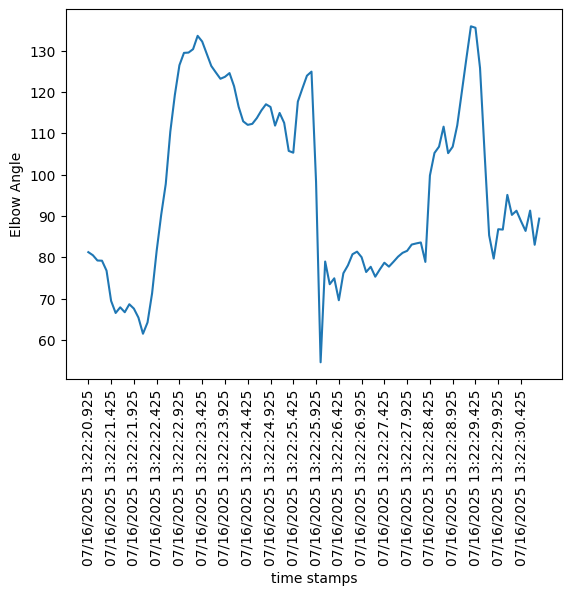

In [24]:
#Graphing results

import matplotlib.pyplot as plt

plt.plot(timestamps, angles)
plt.xlabel("time stamps")

#too many xlables, reduced to 1 in 10
x_index = [i for i in range(len(timestamps)) if i % 5 == 0]
x_labels = [timestamps[i] for i in x_index]
plt.xticks(x_index, x_labels, rotation=90)

plt.ylabel("Elbow Angle")
plt.show()

#add code to plot CV angle results next to quaternion angle results